# Kaggle 
## **<font color=red>Fully self-practice method </font>**
https://www.kaggle.com/datasets/davidgdong/marvel-cinematic-universe-box-office-dataset
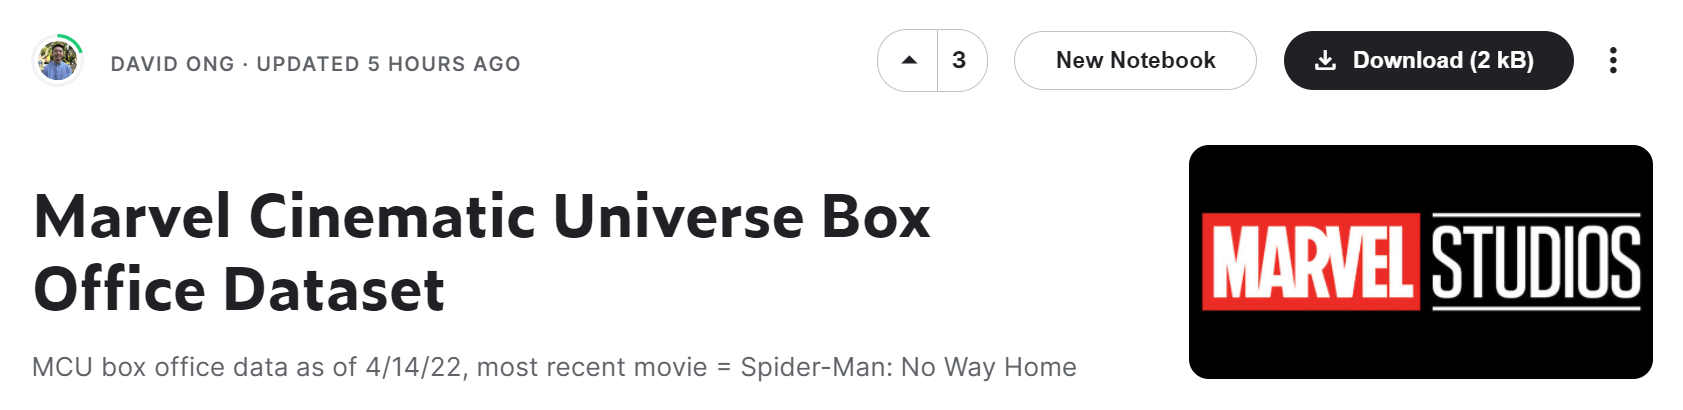

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
%matplotlib inline
%config InlineBackend. figure_format = "retina"

* parse_dates：boolean or list of ints or names or list of lists or dict, default False. 这个参数指定对CSV文件中日期序列的处理方式：
  * 默认为False，原样加载，不解析日期时间，
  * 可以为True，尝试解析日期索引，
  * 可以为数字或 names 的列表，解析指定的列为时间序列，
  * 可以为以列表为元素的列表，解析每个子列表中的字段组合为时间序列，
  * 可以为值为列表的字典，解析每个列表中的字段组合为时间序列，并命名为字典中对应的键值；

In [6]:
mcu=pd.read_csv("mcu_box_office.csv")
#                 ,index_col="release_date",parse_dates=True)
mcu.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [7]:
mcu.dtypes

movie_title             object
mcu_phase                int64
release_date            object
tomato_meter             int64
audience_score           int64
movie_duration           int64
production_budget       object
opening_weekend         object
domestic_box_office     object
worldwide_box_office    object
dtype: object

In [8]:
mcu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


* 必須轉成int 在圖表上才會以"區間"來顯示

In [9]:
# if release_year is index use mcu.iloc[5:9]
for i in range(6,10):
    mcu.iloc[:,i]=mcu.iloc[:,i].str.replace(',','').astype('int64')
mcu.iloc[:,6:10].dtypes

production_budget       int64
opening_weekend         int64
domestic_box_office     int64
worldwide_box_office    int64
dtype: object

In [10]:
sns.set(style = "darkgrid")

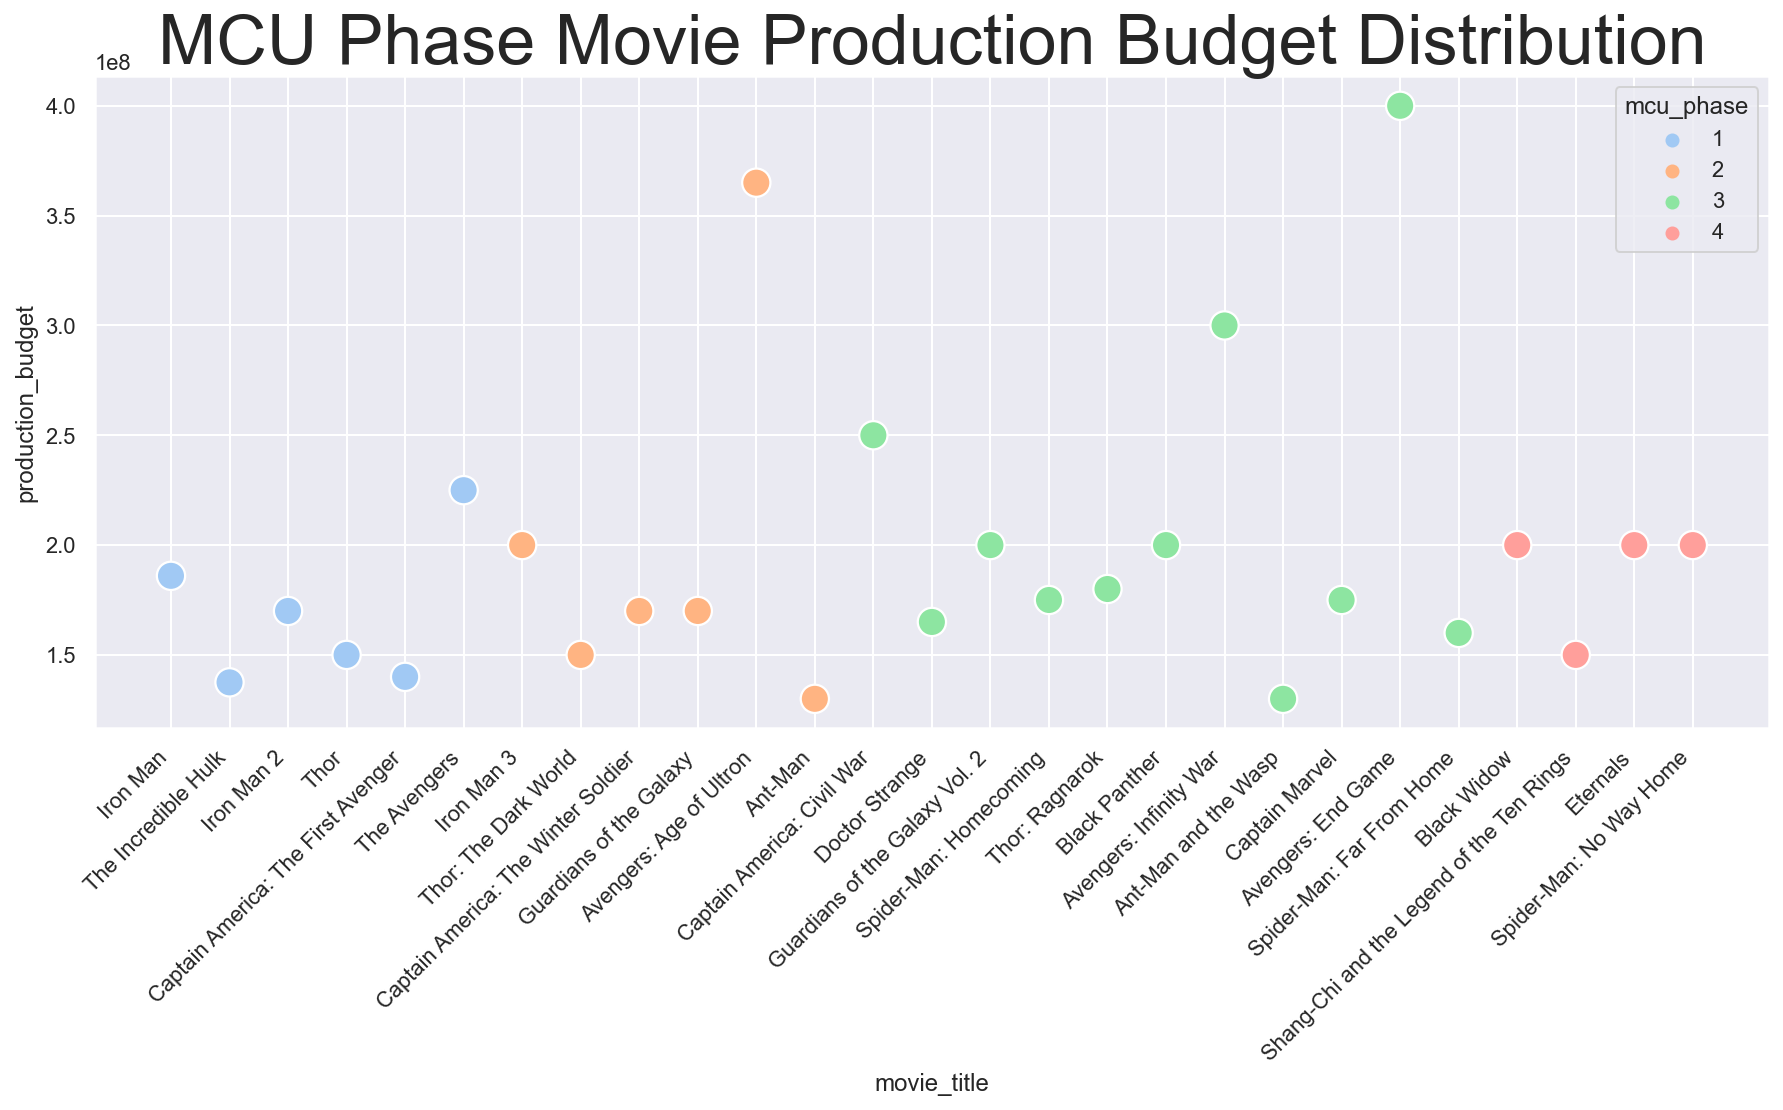

In [11]:
plt.figure(figsize = (15,6))

sns.scatterplot(x="movie_title", y="production_budget", hue="mcu_phase", data=mcu,palette="pastel",s =200)
plt.xticks(rotation=45,ha='right')
plt.title("MCU Phase Movie Production Budget Distribution",fontsize=35)
plt.show()

### MCU Phase Movie Rating status

Text(0.5, 1.0, 'From Audience Score')

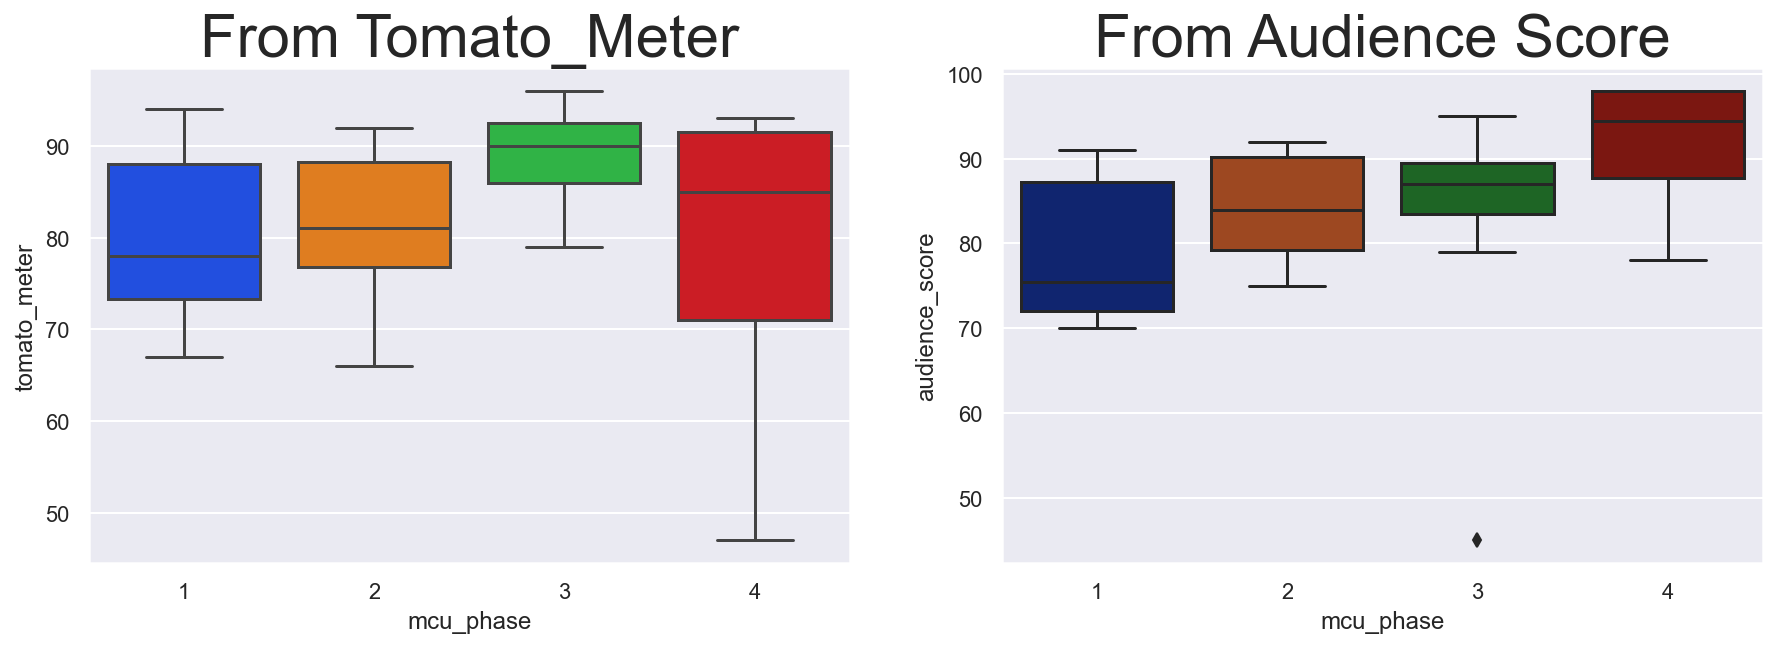

In [12]:
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(x="mcu_phase",y="tomato_meter",palette="bright",data=mcu)
plt.title("From Tomato_Meter",fontsize=30)

plt.subplot(222)
sns.boxplot(x="mcu_phase",y="audience_score",palette="dark",data=mcu)
plt.title("From Audience Score",fontsize=30)


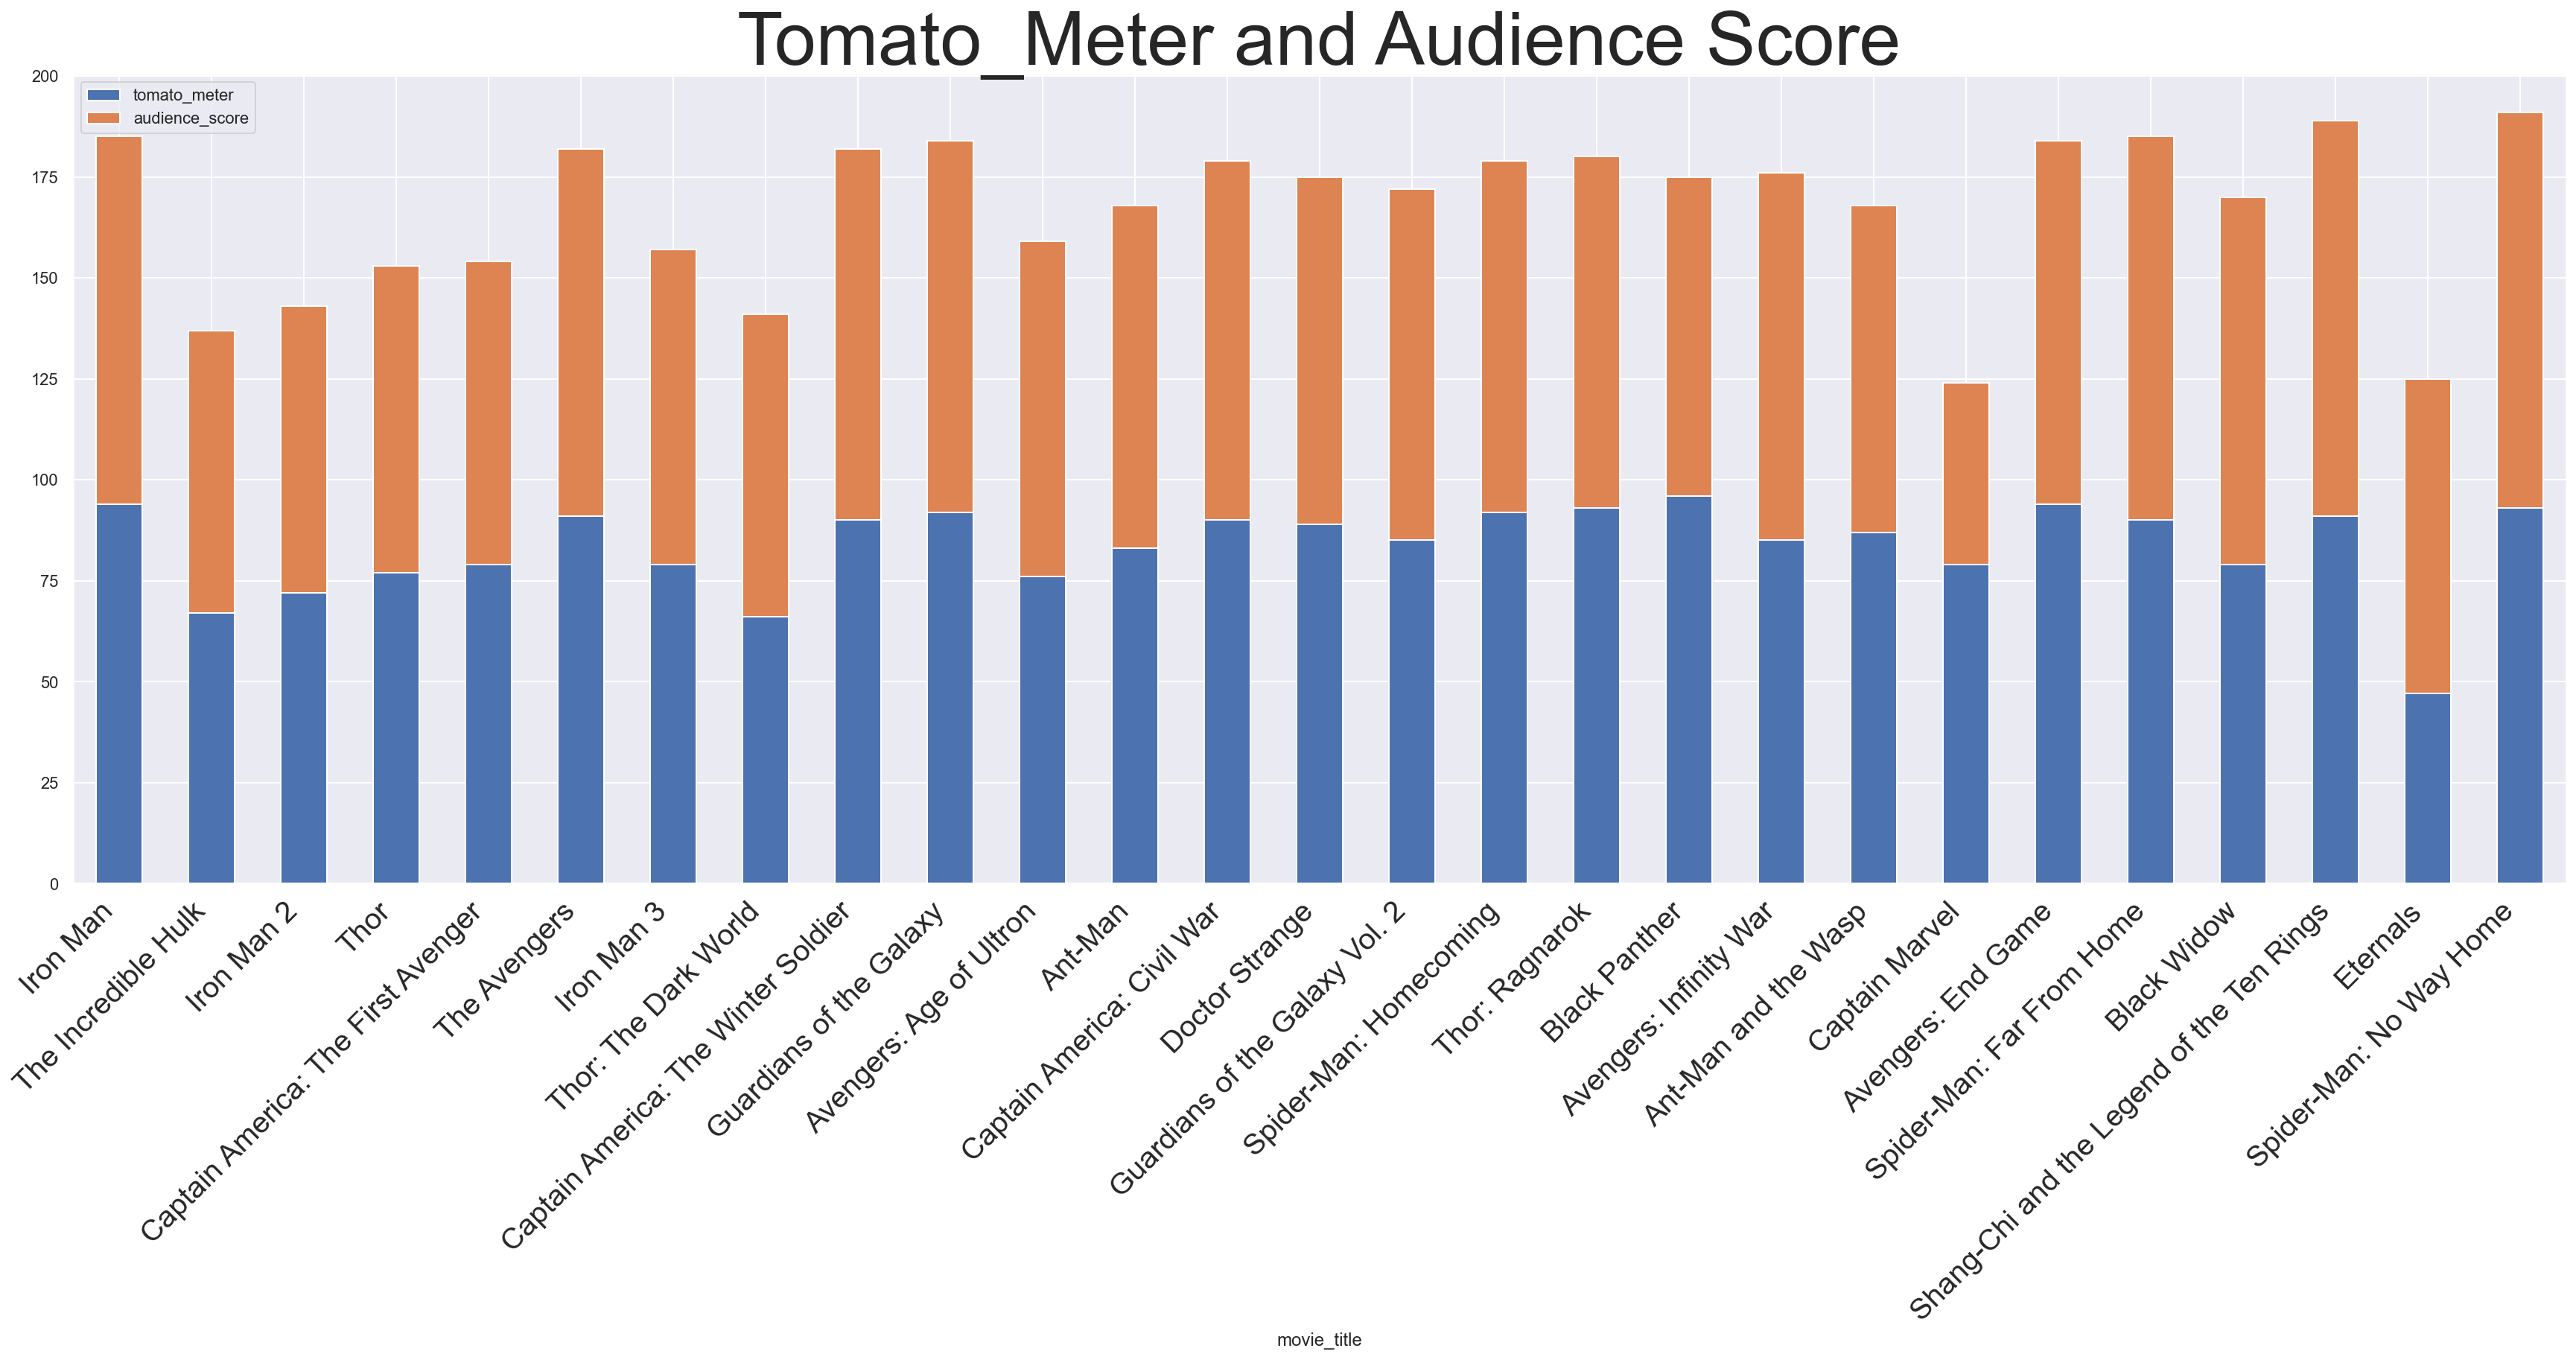

In [13]:
mcu.plot(kind="bar",x="movie_title",
         y=["tomato_meter","audience_score"],
         stacked=True,
         figsize=(30,10),
        grid=True)
plt.xticks(rotation=45,ha='right',fontsize=20)
plt.title("Tomato_Meter and Audience Score",fontsize=50)
plt.show()

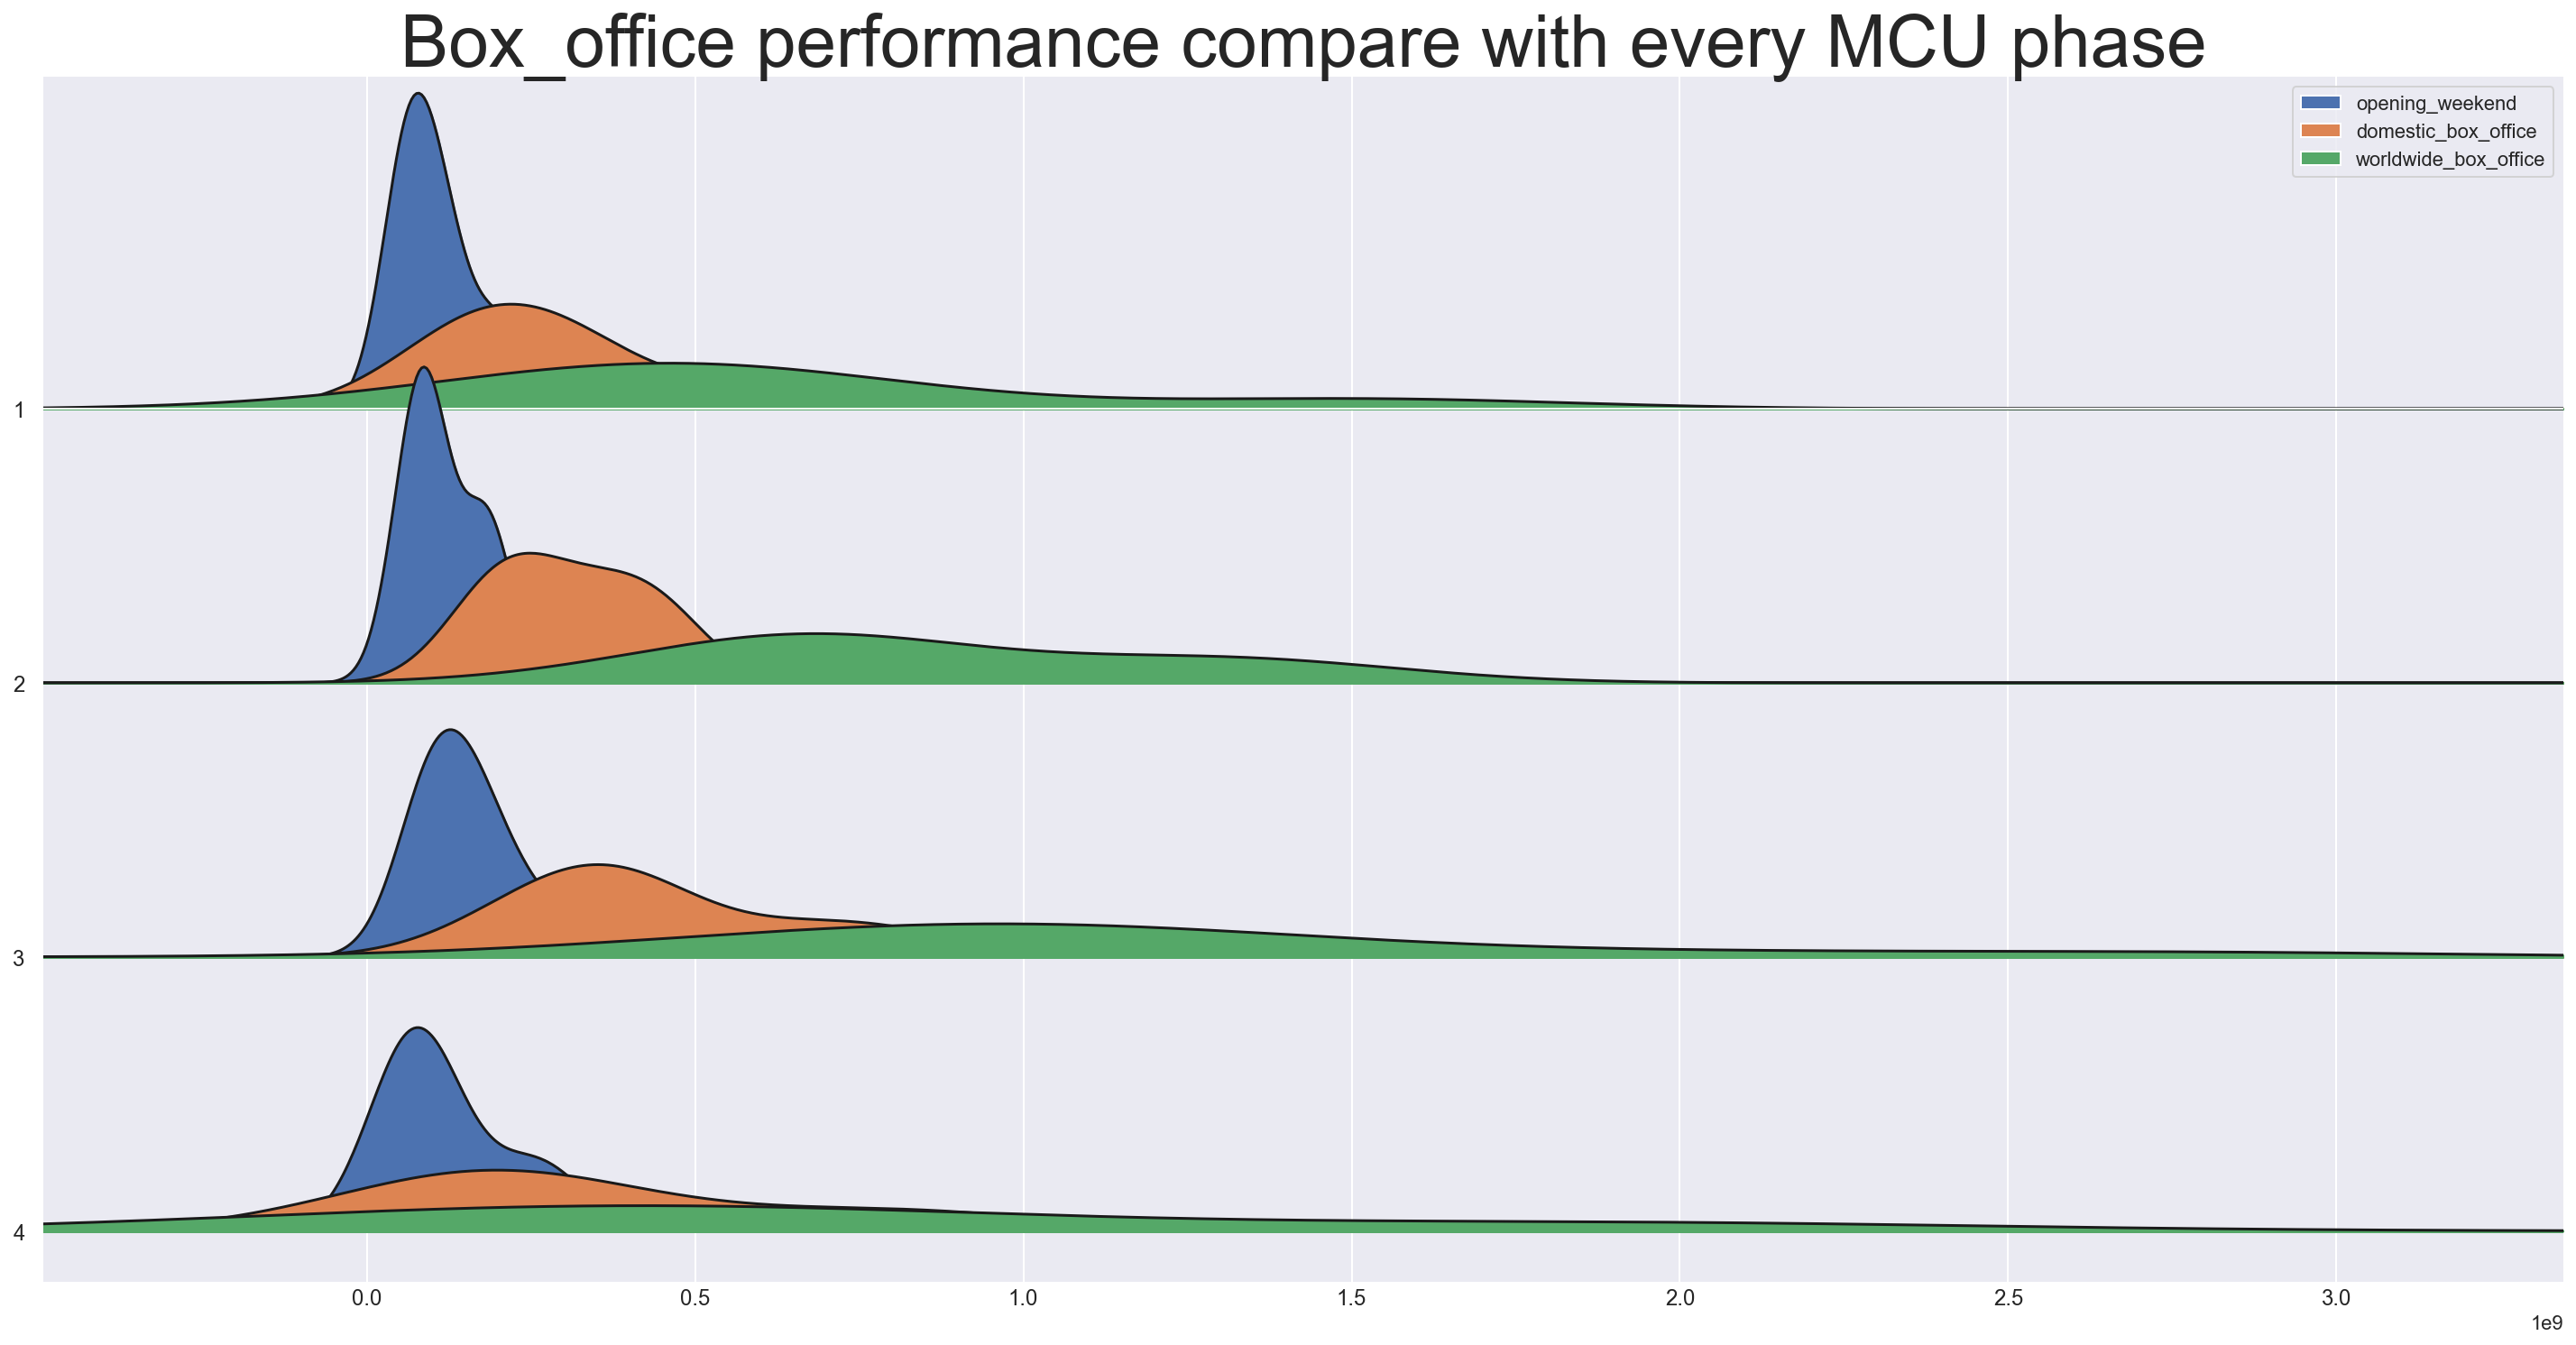

In [14]:
joypy.joyplot(data=mcu,
              column=["opening_weekend","domestic_box_office","worldwide_box_office"],
              legend=True,
              by="mcu_phase",
             figsize=(20,10),
             grid=True)
            
plt.rc("font", size=20)
plt.title("Box_office performance compare with every MCU phase",fontsize=40)
plt.show()

,sum
,production_budget
mcu_phase,
1,1008500000
2,1185000000
3,2335000000
4,750000000


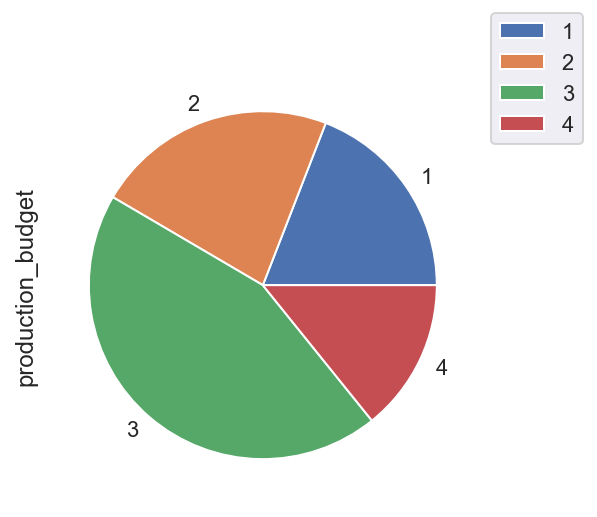

In [15]:
df=mcu.pivot_table(index="mcu_phase",values="production_budget",aggfunc=["sum"])
df.plot(kind="pie",y="sum")
plt.legend(bbox_to_anchor =(1, 1.15), ncol = 1) 
df

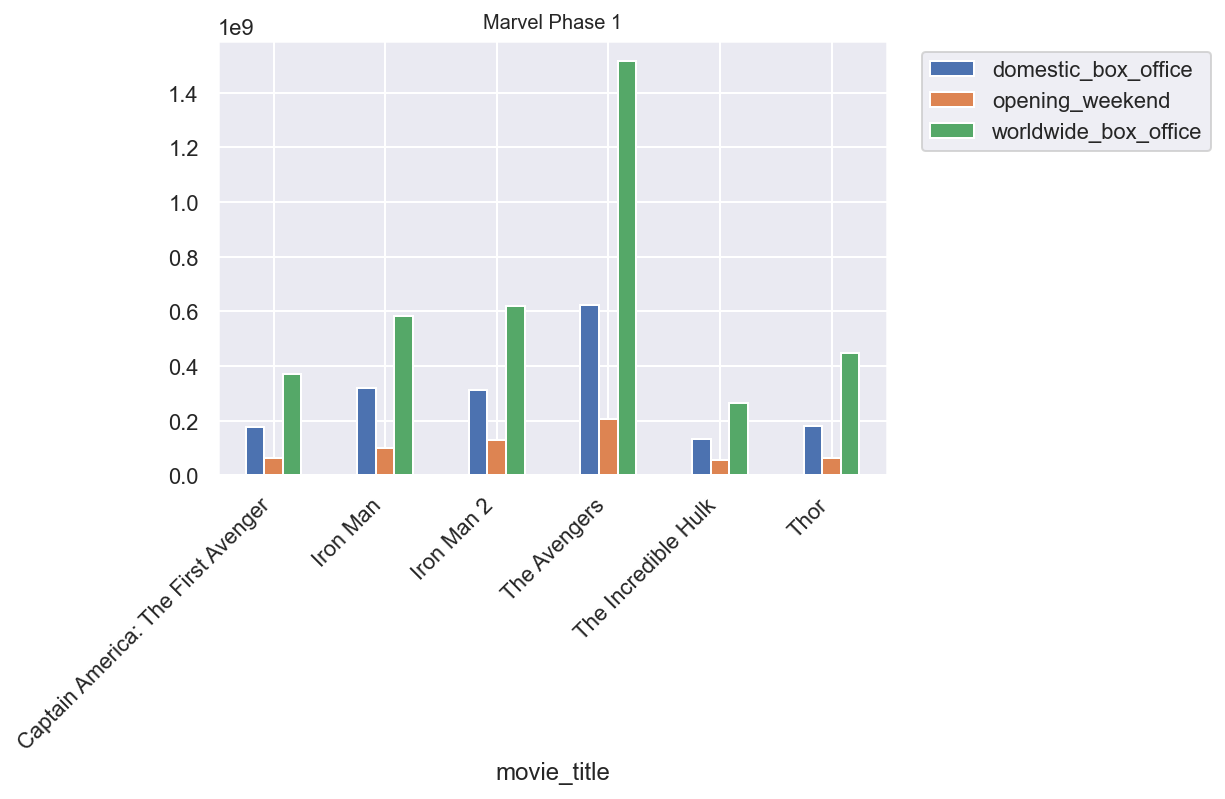

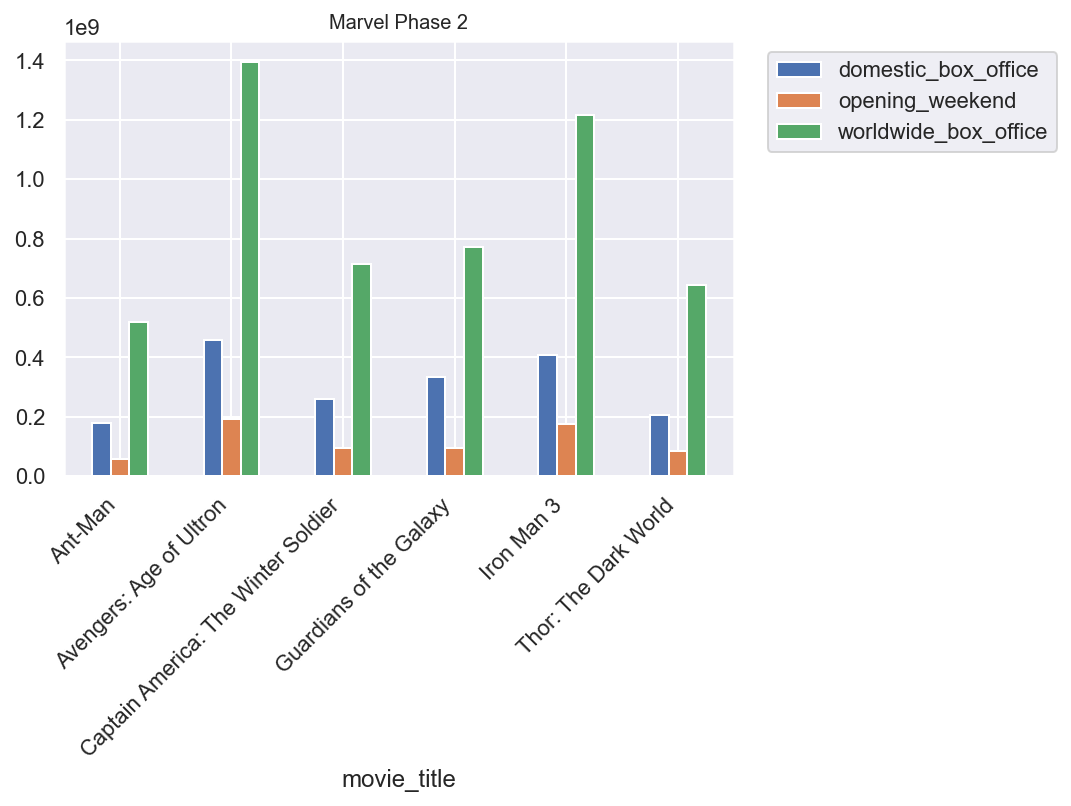

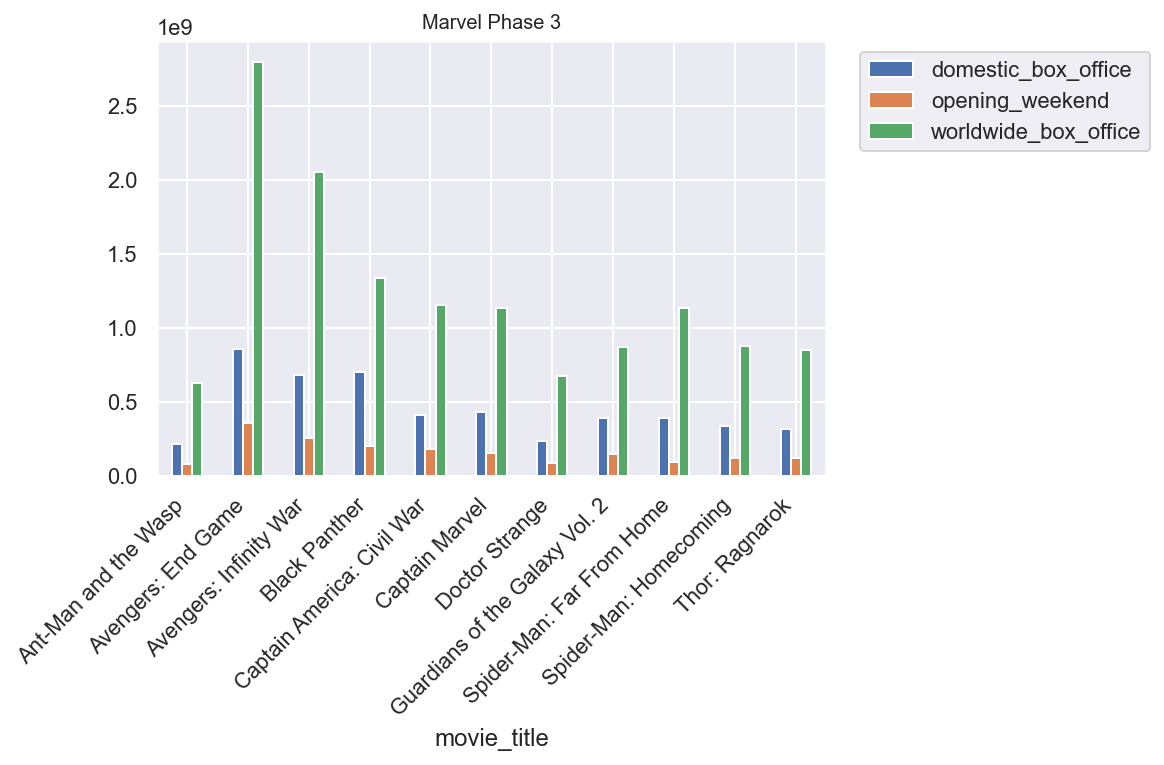

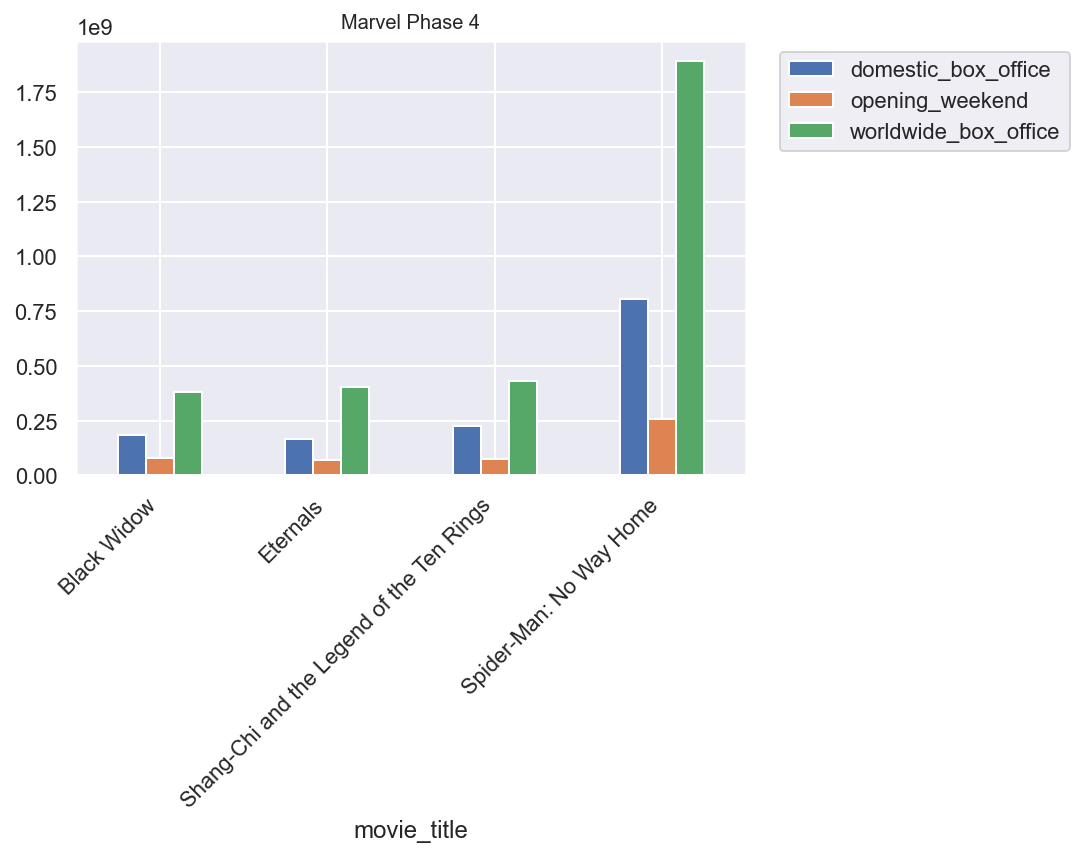

In [55]:
# Groupby Mcu_Phase

for i in range (len(mcu["mcu_phase"].unique())):
    df=mcu.pivot_table(index=mcu.loc[mcu["mcu_phase"]==i+1,"movie_title"],
                       values=["opening_weekend","worldwide_box_office","domestic_box_office"])
    df.plot(kind="bar",figsize=(6,4))
    plt.title("Marvel Phase %s" %(i+1),fontsize=10)
    plt.legend(bbox_to_anchor =(1.5, 1), ncol = 1) 
    plt.xticks(rotation=45,ha='right')

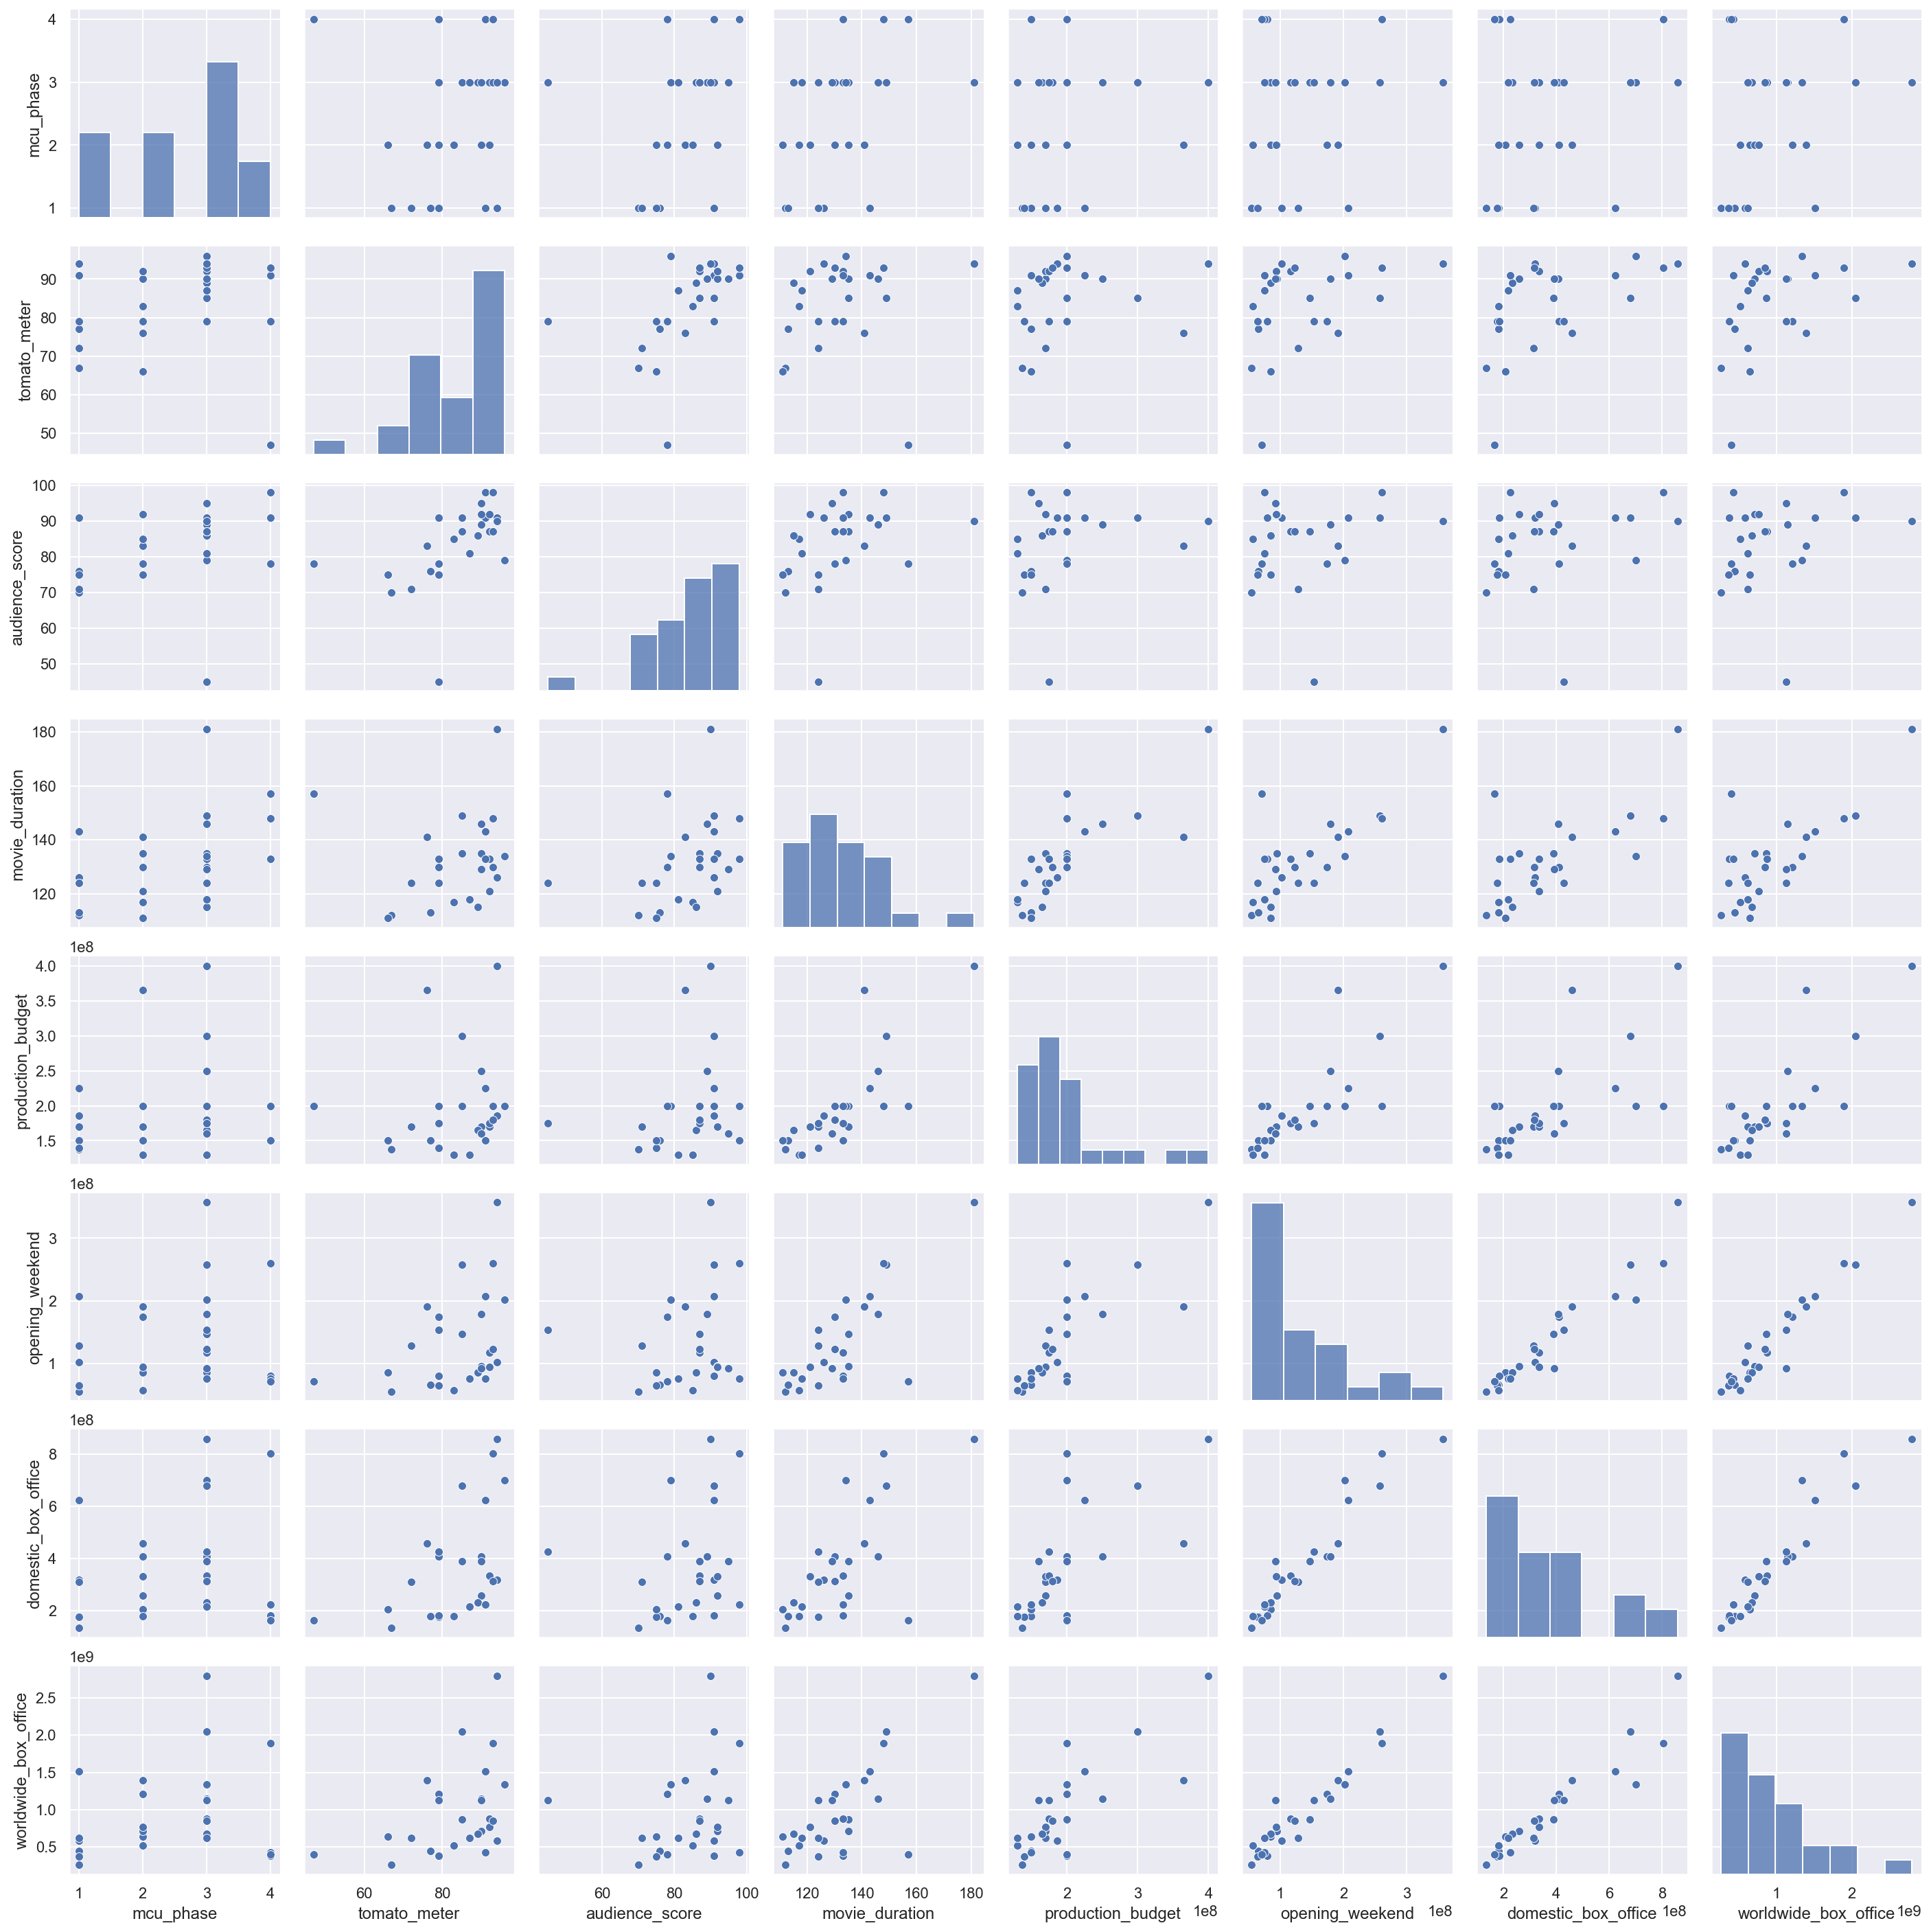

In [18]:
sns.pairplot(mcu)

mean                                       \
          domestic_box_office opening_weekend worldwide_box_office   
mcu_phase                                                            
1                2.911479e+08    1.039793e+08         6.344831e+08   
2                3.080039e+08    1.162873e+08         8.765758e+08   
3                4.500961e+08    1.626475e+08         1.226752e+09   
4                3.442602e+08    1.217977e+08         7.762920e+08   

                          min                                       \
          domestic_box_office opening_weekend worldwide_box_office   
mcu_phase                                                            
1                   134806913        55414050            265573859   
2                   180202163        57225526            518858449   
3                   216648740        75812205            623144660   
4                   164870264        71297219            379751655   

                          max                                       
          domestic_box_office opening_weekend worldwide_box_office  
mcu_phase                                                           
1                   623357910       207438708           1515100211  
2                   459005868       191271109           1395316979  
3                   858373000       357115007           2797800564  
4                   803975784       260138569           1891108035

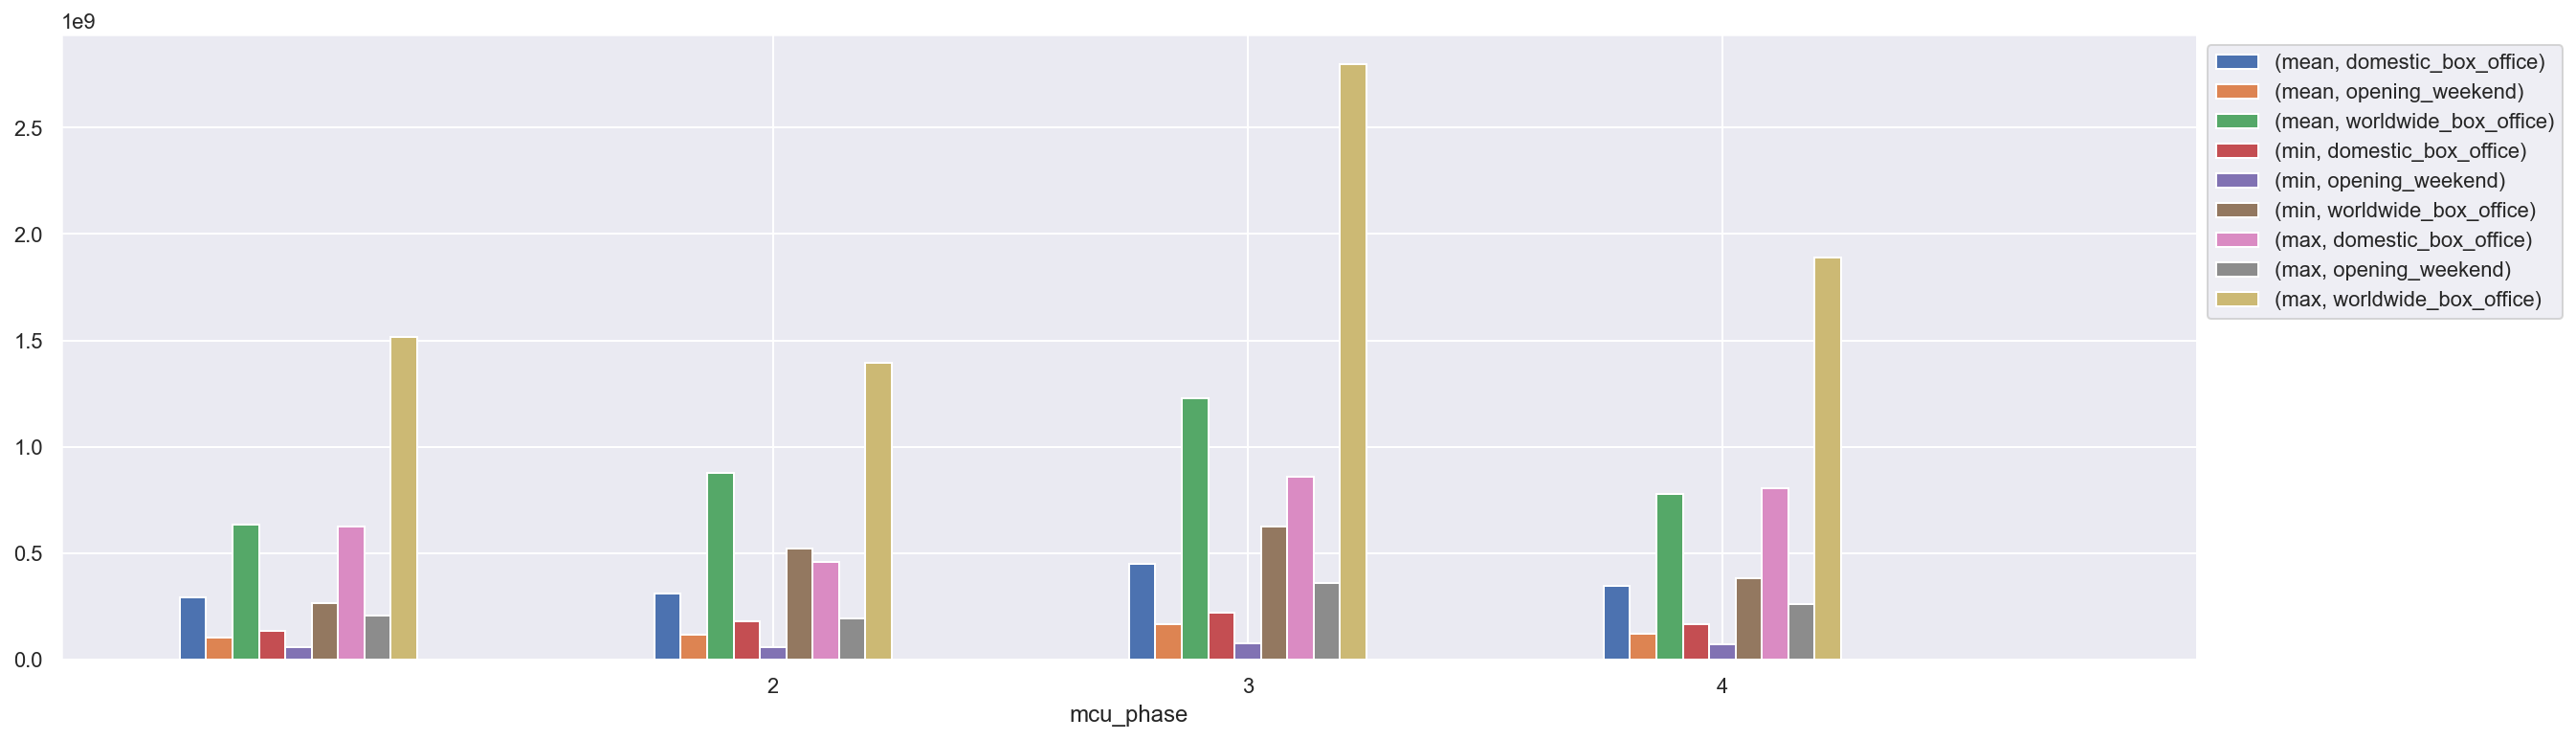

In [90]:
df=mcu.pivot_table(index="mcu_phase",
                   values=["opening_weekend","worldwide_box_office","domestic_box_office"],
                  aggfunc=["mean","min","max"])
df.plot(kind="bar",figsize=(20,6))
plt.xticks(range(1,5,1),rotation=0)
plt.legend(bbox_to_anchor =(1, 1), ncol = 1) 

df

opening_weekend                     
                     mean       min        max
mcu_phase                                     
1            1.039793e+08  55414050  207438708
2            1.162873e+08  57225526  191271109
3            1.626475e+08  75812205  357115007
4            1.217977e+08  71297219  260138569

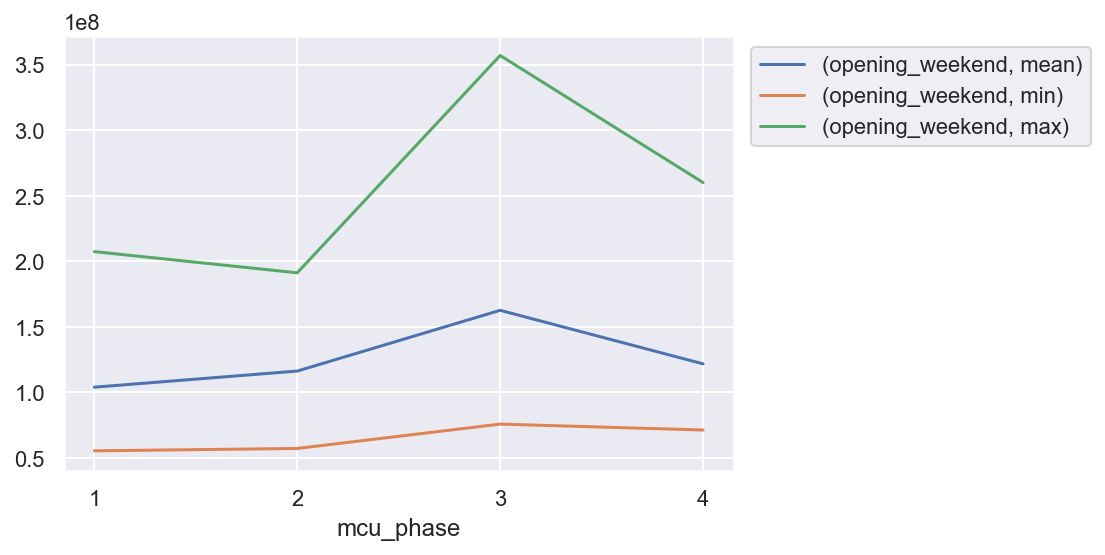

In [91]:
df=mcu.groupby("mcu_phase").agg({"opening_weekend":["mean","min","max"]})
df.plot()
plt.xticks(range(1,5,1))
plt.legend(bbox_to_anchor =(1.55, 1), ncol = 1) 

df